# Chapter 10: Quantum Phase Estimation

Quantum Phase Estimation (QPE) algorithm.

---

**Note:** This notebook corresponds to Chapter 10 of the textbook.

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [49]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import  HamiltonianGate
from Chapter10_QPE_functions import myQPESingleBit, myQPEMultiBit, QiskitQPEWrapper

print('Setup complete!')

Setup complete!


## Hamiltonian

[[-0.25+0.4330127j  0.75+0.4330127j]
 [ 0.75+0.4330127j -0.25+0.4330127j]]


<IPython.core.display.Latex object>

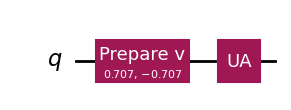

In [50]:
A = np.array([[2,-1],[-1,2]])
f = 0.5
lambdaUpper = 3
t = -2*np.pi*f/lambdaUpper #Note negative
U_A = HamiltonianGate(A, time=t,label = 'UA')
print(np.array(U_A.to_matrix()))
v = np.array([1/np.sqrt(2),-1/np.sqrt(2)])
circuit = QuantumCircuit(1)
circuit.prepare_state(Statevector(v) ,0,'Prepare v')
circuit.append(U_A, qargs=[0])
psi = Statevector(circuit)
display(psi.draw('latex'))
circuit.draw('mpl') 

## Control gate

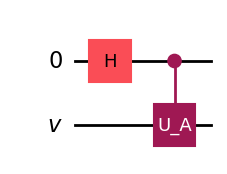

In [51]:
zeroQubit = QuantumRegister(1, '0')
vQubit = QuantumRegister(1, 'v')
circuit = QuantumCircuit(zeroQubit,vQubit) 
circuit.h(0)
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
U = UnitaryGate(UMatrix,'U_A')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.draw('mpl') 

## Probability Model

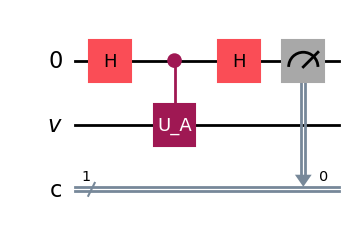

In [52]:
zeroQubit = QuantumRegister(1, '0')
vQubit = QuantumRegister(1, 'v')
cBit = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(zeroQubit,vQubit,cBit) 
circuit.h(0)
UMatrix = 1/np.sqrt(2)*np.array([[1,1],[1j,-1j]]) 
U = UnitaryGate(UMatrix,'U_A')
UControl = U.control(1)
circuit.append(UControl,[0,1])
circuit.h(0)
circuit.measure([0], [0]) 
circuit.draw('mpl') 


## Single digit QPE with multiple qubits v

### Example 1

In [53]:
A = np.array([[1,0],[0,0.75]])
v = np.array([1,0])
lambdaUpper = 2

[thetaEstimates,probabilities] = myQPESingleBit(A,v,lambdaUpper,nShots=1000)
print("Theta estimates:", thetaEstimates)
print("Probabilities:", probabilities)

Counts: {'1': 1000}
Theta estimates: [0.5]
Probabilities: [1.]


### Example 2

In [54]:
A = np.array([[1,0],[0,0.75]])
v = np.array([0,1])
lambdaUpper = 2

[thetaEstimates,probabilities] = myQPESingleBit(A,v,lambdaUpper,nShots=1000)
print("Theta estimates:", thetaEstimates)
print("Probabilities:", probabilities)

Counts: {'1': 849, '0': 151}
Theta estimates: [0.5 0. ]
Probabilities: [0.849 0.151]


## Multiple digit QPE 

### Multibit Example 1

In [55]:
A = np.array([[1,0],[0,0.75]])
v = np.array([0,1])
lambdaUpper = 2
nThetaBits = 2

[thetaEstimates,probabilities] = myQPEMultiBit(A,v,lambdaUpper,m = nThetaBits, nShots=1000)
thetaTilde = np.sum(thetaEstimates*probabilities)
print("Theta estimates:", thetaEstimates)
print("Probabilities:", probabilities)
print("thetaTilde: ", thetaTilde)

{'01': 424, '00': 78, '11': 78, '10': 420}
Theta estimates: [0.25 0.5  0.   0.75]
Probabilities: [0.424 0.42  0.078 0.078]
thetaTilde:  0.3745


### Multibit Example 2

In [56]:
nThetaBits = 3

[thetaEstimates,probabilities] = myQPEMultiBit(A,v,lambdaUpper,m = nThetaBits, nShots=1000)
thetaTilde = np.sum(thetaEstimates*probabilities)
print("Theta estimates:", thetaEstimates)
print("Probabilities:", probabilities)
print("thetaTilde: ", thetaTilde)

{'011': 1000}
Theta estimates: [0.375]
Probabilities: [1.]
thetaTilde:  0.375


### Multibit Example 3

In [57]:
nThetaBits = 5

[thetaEstimates,probabilities] = myQPEMultiBit(A,v,lambdaUpper,m = nThetaBits, nShots=1000)
thetaTilde = np.sum(thetaEstimates*probabilities)
print("Theta estimates:", thetaEstimates)
print("Probabilities:", probabilities)
print("thetaTilde: ", thetaTilde)

{'01100': 1000}
Theta estimates: [0.375]
Probabilities: [1.]
thetaTilde:  0.375


## Qiskit QPE Wrapper

## QPE Example 1

In [58]:
A = np.array([[1,0],[0,0.75]])
v0 = np.array([0,1])
v1 = np.array([1,0])
Lambda = [0.75,1]
a = [1/np.sqrt(2),1/np.sqrt(2)]
a= [0,1]
v = a[0]*v0 + a[1]*v1
lambdaUpper = 2
m = 1




## QPE Example 2

In [59]:
A = np.array([[2,-1],[-1,2]])
v0 = np.array([1/np.sqrt(2),1/np.sqrt(2)])
v1 = np.array([1/np.sqrt(2),-1/np.sqrt(2)])
Lambda = [1,3]
a = [1,0]
v = a[0]*v0 + a[1]*v1
lambdaUpper = 6
m = 4



## QPE Example 3

In [60]:
A = np.array([[1,0,0,-0.5],[0,1,0,0],[0,0,1,0],[-0.5,0,0,1]])
v0 = np.array([1/np.sqrt(2),0,0,1/np.sqrt(2)])
v1 = np.array([0,1,0,0])
v2 = np.array([0,0,1,0])
v3 = np.array([1/np.sqrt(2),0,0,-1/np.sqrt(2)])
Lambda = [0.5,1,1,1.5]
#a = [1/np.sqrt(4),1/np.sqrt(4),1/np.sqrt(4),1/np.sqrt(4)]
a = [0,0,1,0]
v = a[0]*v0 + a[1]*v1 + a[2]*v2 + a[3]*v3
lambdaUpper = 3
m = 2
[thetaEstimates,P] = myQPESingleBit(A,v,lambdaUpper)	
print("thetaEstimates:",thetaEstimates)
print("probabilities:", P)
thetaTilde = np.sum(thetaEstimates*P)
print("thetaTilde:", thetaTilde)
print("EigenvalueTilde:",thetaTilde*lambdaUpper)

Counts: {'1': 759, '0': 241}
thetaEstimates: [0.5 0. ]
probabilities: [0.759 0.241]
thetaTilde: 0.3795
EigenvalueTilde: 1.1385


In [61]:
m = 3
A = np.array([[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]])
v = np.random.rand(4)
v = v/np.linalg.norm(v)
f = 0.5
lambdaUpper = 4

